# Курсовой проект на тему "Предсказание цены на квартиры"
***

##  1. Анализ и подготовка данных

### Импортируем библиотеки

In [512]:
import pandas as pd
import numpy as np

### Читаем файл с тренировочными данными train.csv

In [371]:
d = pd.read_csv('train.csv')

### Смотрим описание

In [372]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


### Так как размеры разные (10000, 7887, 5202), то в данных есть пропуски (неопределенные значения)

### Смотрим несколько первых строк

In [373]:
d.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


### Посмотрим, что там не так со столбцом LifeSquare

In [374]:
ls = d['LifeSquare']

In [375]:
lsd = pd.Series(ls)

In [376]:
lsd.describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

### Заменим NaN-значения LifeSquare значениями из столбца Square. Для этого заведем новый датафрейм d_cleared.

In [377]:
d_cleared = d.copy()

In [378]:
d_cleared.loc[ls.isna(), 'LifeSquare'] = d.loc[ls.isna(), 'Square']

In [379]:
d_cleared.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,80.312926,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,64.511437,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [380]:
d_cleared['LifeSquare'].describe()

count    10000.000000
mean        42.091874
std         77.880874
min          0.370619
25%         25.506959
50%         37.562685
75%         50.098049
max       7480.592129
Name: LifeSquare, dtype: float64

### Посмотрим на корреляцию LifeSquare и Square, тех, что до замены NaN-ов.

In [381]:
d_tmp = pd.DataFrame({'LS':pd.Series(d['LifeSquare']), 'TS':pd.Series(d['Square'])})

In [382]:
d_tmp.head(10)

,LS,TS
0,29.442751,47.981561
1,40.049543,65.683640
2,29.197612,44.947953
3,52.731512,53.352981
4,23.776169,39.649192
5,46.683720,80.384479
6,37.160377,62.254114
7,NaN,80.312926
8,NaN,64.511437
9,18.915552,46.461409


In [383]:
d_tmp.corr()

,LS,TS
LS,1.000000,0.196129
TS,0.196129,1.000000


In [384]:
import matplotlib.pyplot as plt

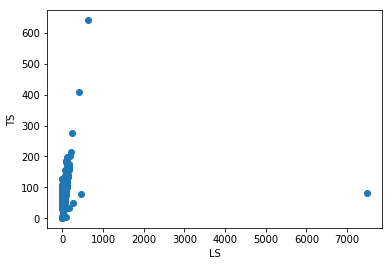

In [385]:
plt.scatter(d_tmp.loc[:,'LS'], d_tmp.loc[:,'TS'])
plt.xlabel('LS')
plt.ylabel('TS')
plt.show()

### Удалим выбросы и логически противоречивые данные, и пересчитаем коэффициент корреляции.

In [386]:
d_tmp_cleared = d_tmp.copy()

In [387]:
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['LS'] > 7000].index, inplace=True)
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['TS'] > 7000].index, inplace=True)
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['LS'] > 600].index, inplace=True)
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['TS'] > 600].index, inplace=True)
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['LS'] > d_tmp_cleared['TS']].index, inplace=True)

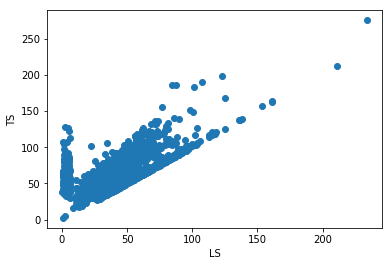

In [388]:
plt.scatter(d_tmp_cleared.loc[:,'LS'], d_tmp_cleared.loc[:,'TS'])
plt.xlabel('LS')
plt.ylabel('TS')
plt.show()

In [389]:
r_TL = d_tmp_cleared.corr()
r_corr = r_TL['LS']['TS']
r_corr

0.7826915415512269

In [390]:
d_tmp_cleared.corr(method='spearman')

,LS,TS
LS,1.000000,0.813652
TS,0.813652,1.000000


### Коэффициент корреляции - 0.8. Вывод: LifeSquare и Square довольно-таки коррелированы. Значит, заменяем NaN в LifeSquare соответствующими значениями Square.

In [391]:
d_tmp_cleared.describe()

,LS,TS
count,7404.000000,9516.000000
mean,34.490831,56.074374
std,16.107193,18.841455
min,0.370619,2.377248
25%,22.544752,41.816743
50%,32.020108,52.450782
75%,43.777890,65.832811
max,233.949309,275.645284


In [392]:
d_cleared = d_tmp_cleared.copy()
d_cleared.loc[d_cleared['LS'].isna(), 'LS'] = r_corr * d_cleared.loc[d_cleared['LS'].isna(), 'TS']

In [393]:
d_cleared.head(10)

,LS,TS
0,29.442751,47.981561
1,40.049543,65.683640
2,29.197612,44.947953
3,52.731512,53.352981
4,23.776169,39.649192
5,46.683720,80.384479
6,37.160377,62.254114
7,62.860248,80.312926
8,50.492556,64.511437
9,18.915552,46.461409


### Чистка изначального фрейма

In [394]:
d_cleared = d.copy()

In [395]:
d_cleared.drop(d_cleared[d_cleared['LifeSquare'] > 7000].index, inplace=True)
d_cleared.drop(d_cleared[d_cleared['Square'] > 7000].index, inplace=True)
d_cleared.drop(d_cleared[d_cleared['LifeSquare'] > 600].index, inplace=True)
d_cleared.drop(d_cleared[d_cleared['Square'] > 600].index, inplace=True)
d_cleared.drop(d_cleared[d_cleared['LifeSquare'] > d_cleared['Square']].index, inplace=True)

### Линейное предсказание LifeSquare по Square (через коэфф. корреляции; в среднем, должно быть лучше, чем простое копирование)

In [396]:
d_cleared.loc[d_cleared['LifeSquare'].isna(), 'LifeSquare'] = r_corr * d_cleared.loc[d_cleared['LifeSquare'].isna(), 'Square']

In [397]:
d_cleared.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,62.860248,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,50.492556,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [398]:
d_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 9999
Data columns (total 20 columns):
Id               9516 non-null int64
DistrictId       9516 non-null int64
Rooms            9516 non-null float64
Square           9516 non-null float64
LifeSquare       9516 non-null float64
KitchenSquare    9516 non-null float64
Floor            9516 non-null int64
HouseFloor       9516 non-null float64
HouseYear        9516 non-null int64
Ecology_1        9516 non-null float64
Ecology_2        9516 non-null object
Ecology_3        9516 non-null object
Social_1         9516 non-null int64
Social_2         9516 non-null int64
Social_3         9516 non-null int64
Healthcare_1     5031 non-null float64
Helthcare_2      9516 non-null int64
Shops_1          9516 non-null int64
Shops_2          9516 non-null object
Price            9516 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


### Разберемся с комнатами

In [399]:
rooms = d_cleared['Rooms']

In [400]:
rooms.describe()

count    9516.000000
mean        1.896385
std         0.840629
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        19.000000
Name: Rooms, dtype: float64

In [401]:
d_RP = pd.DataFrame({'ROOMS':pd.Series(d_cleared['Rooms']), 'PRICE':pd.Series(d_cleared['Price'])})

In [402]:
d_RP.corr()

,PRICE,ROOMS
PRICE,1.000000,0.556186
ROOMS,0.556186,1.000000


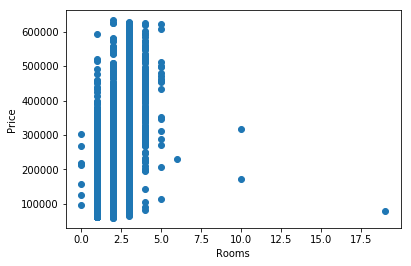

In [403]:
plt.scatter(d_RP.loc[:,'ROOMS'], d_RP.loc[:,'PRICE'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

### Параметр Rooms по определению целочисленный, четкой корреляции между Rooms и Price не прослеживается. Оно и понятно - на цену влияет множество других факторов.

In [404]:
rooms.value_counts()

2.0     3716
1.0     3487
3.0     2140
4.0      143
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

### Удалим маловероятное количество комнат: 0, 5, 6, 10, 19

In [405]:
d_cleared.drop(d_cleared[d_cleared['Rooms'] > 4].index, inplace=True)

In [406]:
d_cleared.drop(d_cleared[d_cleared['Rooms'] == 0].index, inplace=True)

In [407]:
d_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9486 entries, 0 to 9999
Data columns (total 20 columns):
Id               9486 non-null int64
DistrictId       9486 non-null int64
Rooms            9486 non-null float64
Square           9486 non-null float64
LifeSquare       9486 non-null float64
KitchenSquare    9486 non-null float64
Floor            9486 non-null int64
HouseFloor       9486 non-null float64
HouseYear        9486 non-null int64
Ecology_1        9486 non-null float64
Ecology_2        9486 non-null object
Ecology_3        9486 non-null object
Social_1         9486 non-null int64
Social_2         9486 non-null int64
Social_3         9486 non-null int64
Healthcare_1     5017 non-null float64
Helthcare_2      9486 non-null int64
Shops_1          9486 non-null int64
Shops_2          9486 non-null object
Price            9486 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [408]:
rooms = d_cleared['Rooms']

In [409]:
d_RP = pd.DataFrame({'ROOMS':pd.Series(d_cleared['Rooms']), 'PRICE':pd.Series(d_cleared['Price'])})

In [410]:
d_RP.corr()

,PRICE,ROOMS
PRICE,1.000000,0.575314
ROOMS,0.575314,1.000000


In [411]:
d_RP.corr(method='spearman')

,PRICE,ROOMS
PRICE,1.000000,0.601828
ROOMS,0.601828,1.000000


### Коэффициент корреляции, все-таки, небольшой (менее 0,8).

### Разберемся с этажами и этажностью

In [412]:
floors = d_cleared['Floor']

In [413]:
floors.describe()

count    9486.000000
mean        8.459836
std         5.172004
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        42.000000
Name: Floor, dtype: float64

In [414]:
floors.value_counts()

4     905
5     835
3     815
6     780
7     727
8     615
9     580
2     566
10    527
11    439
12    405
13    376
14    345
15    276
16    272
17    229
1     224
18    178
19    111
20     61
21     49
22     49
24     42
25     28
23     25
26     15
27      5
32      2
42      1
33      1
28      1
37      1
31      1
Name: Floor, dtype: int64

### Удалим маловероятные этажи

In [415]:
d_cleared.drop(d_cleared[d_cleared['Floor'] > 19].index, inplace=True)

In [416]:
house_floors = d_cleared['HouseFloor']

In [417]:
house_floors.describe()

count    9205.000000
mean       12.315046
std         6.291886
min         0.000000
25%         9.000000
50%        12.000000
75%        17.000000
max        99.000000
Name: HouseFloor, dtype: float64

In [418]:
house_floors.value_counts()

17.0    2173
9.0     1358
12.0    1045
5.0     1018
14.0     618
16.0     564
1.0      407
22.0     263
25.0     251
0.0      237
8.0      140
24.0     127
10.0     124
4.0      124
15.0     117
3.0      107
19.0      88
20.0      88
18.0      77
7.0       53
6.0       52
2.0       39
11.0      27
13.0      26
23.0      26
21.0      20
30.0      17
40.0       4
28.0       3
32.0       3
27.0       3
37.0       1
29.0       1
99.0       1
31.0       1
45.0       1
39.0       1
Name: HouseFloor, dtype: int64

In [419]:
d_cleared.drop(d_cleared[d_cleared['HouseFloor'] > 25].index, inplace=True)

In [420]:
d_FHF = pd.DataFrame({'Floors':pd.Series(d_cleared['Floor']), 'HouseFloor':pd.Series(d_cleared['HouseFloor'])})

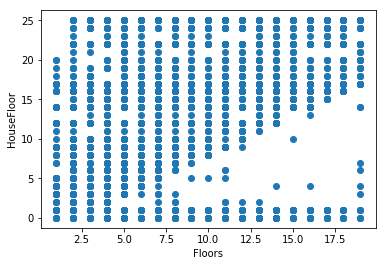

In [421]:
plt.scatter(d_FHF.loc[:,'Floors'], d_FHF.loc[:,'HouseFloor'])
plt.xlabel('Floors')
plt.ylabel('HouseFloor')
plt.show()

### Так как этаж не должен превышать этажность дома, удалим противоречивые данные

In [422]:
d_cleared.drop(d_cleared[d_cleared['Floor'] > d_cleared['HouseFloor']].index, inplace=True)

In [423]:
d_FHF = pd.DataFrame({'Floors':pd.Series(d_cleared['Floor']), 'HouseFloor':pd.Series(d_cleared['HouseFloor'])})

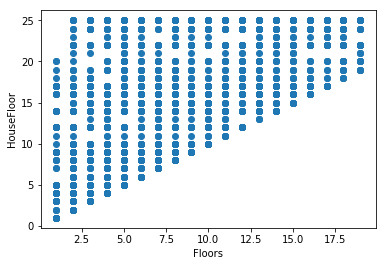

In [424]:
plt.scatter(d_FHF.loc[:,'Floors'], d_FHF.loc[:,'HouseFloor'])
plt.xlabel('Floors')
plt.ylabel('HouseFloor')
plt.show()

In [425]:
house_floors = d_cleared['HouseFloor']
house_floors.describe()

count    7579.000000
mean       13.554954
std         5.321219
min         1.000000
25%         9.000000
50%        14.000000
75%        17.000000
max        25.000000
Name: HouseFloor, dtype: float64

In [426]:
house_floors.value_counts()

17.0    2035
9.0     1179
12.0     941
5.0      780
14.0     573
16.0     513
22.0     263
25.0     251
24.0     127
10.0     116
8.0      111
15.0     106
20.0      88
19.0      88
4.0       86
18.0      74
3.0       54
7.0       44
6.0       38
23.0      26
13.0      22
21.0      20
11.0      19
2.0       14
1.0       11
Name: HouseFloor, dtype: int64

In [427]:
floors = d_cleared['Floor']

In [428]:
price = d_cleared['Price']

In [429]:
d_PF = pd.DataFrame({'Floor':pd.Series(floors), 'Price':pd.Series(price)})

In [430]:
d_PF.corr()

,Floor,Price
Floor,1.000000,0.087786
Price,0.087786,1.000000


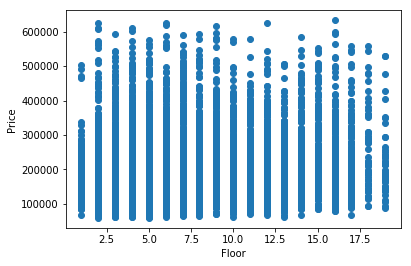

In [431]:
plt.scatter(floors, price)
plt.xlabel('Floor')
plt.ylabel('Price')
plt.show()

In [432]:
d_PHF = pd.DataFrame({'HouseFloor':pd.Series(house_floors), 'Price':pd.Series(price)})

In [433]:
d_PHF.corr()

,HouseFloor,Price
HouseFloor,1.000000,0.055673
Price,0.055673,1.000000


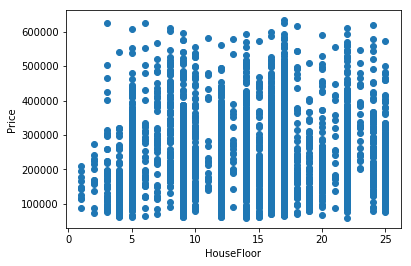

In [434]:
house_floors = d_cleared['HouseFloor']

plt.scatter(house_floors, price)
plt.xlabel('HouseFloor')
plt.ylabel('Price')
plt.show()

### Корреляции никакой...

### Выясним года

In [435]:
years = d_cleared['HouseYear']

In [436]:
years.describe()

count    7.579000e+03
mean     4.629991e+03
std      2.303080e+05
min      1.910000e+03
25%      1.973000e+03
50%      1.977000e+03
75%      1.999000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [437]:
years.value_counts()

1977        1687
2015         182
2016         174
2017         170
1970         170
1969         163
1972         151
1971         145
1974         145
1968         138
1973         137
1965         132
1976         132
1975         131
2014         131
1963         124
1967         121
1964         115
1978         111
1966         110
1982         103
2018         100
1962          98
1960          97
1979          95
1980          94
1981          92
2005          90
1961          89
2004          86
            ... 
1954          11
1952           9
1953           8
1950           7
1935           5
1951           4
1931           4
1918           4
1934           3
1938           3
1937           3
1933           3
1939           3
1936           2
1940           2
1948           2
1941           2
1917           2
1919           2
1912           2
1929           2
1942           2
1930           2
1932           2
1916           1
1928           1
4968           1
1947          

### Удалим маловероятные и невозможные года

In [438]:
d_cleared.drop(d_cleared[d_cleared['HouseYear'] > 2019].index, inplace=True)

In [439]:
d_cleared.drop(d_cleared[d_cleared['HouseYear'] < 1960].index, inplace=True)

In [440]:
years = d_cleared['HouseYear']
price = d_cleared['Price']

In [441]:
d_YP = pd.DataFrame({'Years':pd.Series(years), 'Price':pd.Series(price)})

In [442]:
d_YP.corr()

,Price,Years
Price,1.000000,0.095462
Years,0.095462,1.000000


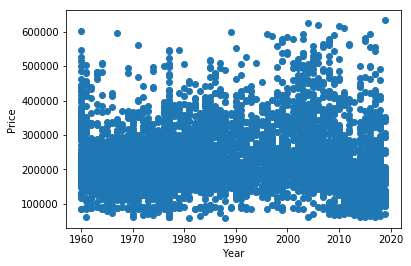

In [443]:
plt.scatter(years, price)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [444]:
d_cleared.shape

(7327, 20)

### Разберемся с районами

In [445]:
districts = d_cleared['DistrictId']

In [446]:
d_DP = pd.DataFrame({'District':pd.Series(districts), 'Price':pd.Series(price)})

In [447]:
d_DP.corr()

,District,Price
District,1.000000,0.255983
Price,0.255983,1.000000


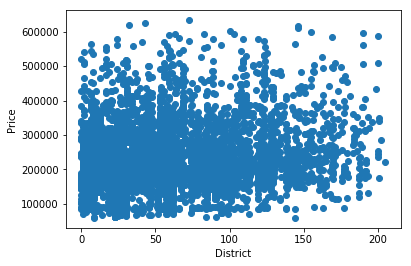

In [448]:
plt.scatter(districts, price)
plt.xlabel('District')
plt.ylabel('Price')
plt.show()

### Удалим лишние столбцы

In [449]:
d_cleared.drop(columns=['KitchenSquare', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2'], inplace=True)

In [450]:
d_cleared.drop(columns=['Id'], inplace=True)
d_cleared.reset_index(drop=True, inplace=True)

In [451]:
d_cleared.head(10)

,DistrictId,Rooms,Square,LifeSquare,Floor,HouseFloor,HouseYear,Price
0,35,2.0,47.981561,29.442751,7,9.0,1969,184966.930730
1,41,3.0,65.683640,40.049543,7,9.0,1978,300009.450063
2,53,2.0,44.947953,29.197612,8,12.0,1968,220925.908524
3,58,2.0,53.352981,52.731512,8,17.0,1977,175616.227217
4,99,1.0,39.649192,23.776169,11,12.0,1976,150226.531644
5,59,3.0,80.384479,46.683720,5,17.0,2011,215898.447742
6,154,2.0,62.254114,37.160377,3,5.0,1960,296021.204377
7,1,2.0,64.511437,50.492556,9,17.0,1977,229102.795999
8,23,1.0,46.461409,18.915552,13,17.0,2014,95380.220993
9,28,2.0,46.304907,27.922584,8,9.0,1973,204243.553129


### Сохраним копию чтобы 10 раз не пересчитывать!

In [452]:
d_store = d_cleared.copy()

### Стартовая точка для перезапуска!

In [453]:
d_cleared = d_store.copy()

In [454]:
d_cleared.describe()

,DistrictId,Rooms,Square,LifeSquare,Floor,HouseFloor,HouseYear,Price
count,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000
mean,50.718575,1.868841,54.672421,36.095339,7.726355,13.772485,1985.140576,210573.192539
std,43.538975,0.792656,17.389632,15.248839,4.430621,5.223241,16.880881,86808.281421
min,0.000000,1.000000,16.117154,0.795539,1.000000,1.000000,1960.000000,59174.778028
25%,17.000000,1.000000,41.356234,23.614036,4.000000,9.000000,1974.000000,155184.475523
50%,39.000000,2.000000,50.769111,33.256028,7.000000,14.000000,1977.000000,191415.433911
75%,78.000000,2.000000,64.522315,45.635597,11.000000,17.000000,1999.000000,245382.063988
max,205.000000,4.000000,186.692602,153.685835,19.000000,25.000000,2019.000000,633233.466570


In [455]:
d_cleared['HouseYear'] = d_cleared['HouseYear'].astype('category')
d_cleared['Rooms'] = d_cleared['Rooms'].astype('category')
d_cleared['Floor'] = d_cleared['Floor'].astype('category')
d_cleared['HouseFloor'] = d_cleared['HouseFloor'].astype('category')
d_cleared['DistrictId'] = d_cleared['DistrictId'].astype('category')
d_cleared = pd.get_dummies(d_cleared)

In [456]:
d_cleared.describe()

,Square,LifeSquare,Price,DistrictId_0,DistrictId_1,DistrictId_2,DistrictId_3,DistrictId_4,DistrictId_5,DistrictId_6,...,HouseYear_2010,HouseYear_2011,HouseYear_2012,HouseYear_2013,HouseYear_2014,HouseYear_2015,HouseYear_2016,HouseYear_2017,HouseYear_2018,HouseYear_2019
count,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,...,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000,7327.000000
mean,54.672421,36.095339,210573.192539,0.005732,0.066057,0.008871,0.009144,0.001092,0.002730,0.050635,...,0.009554,0.010100,0.007916,0.009008,0.017879,0.024840,0.023748,0.023202,0.013648,0.005596
std,17.389632,15.248839,86808.281421,0.075499,0.248399,0.093775,0.095194,0.033027,0.052178,0.219265,...,0.097282,0.099995,0.088625,0.094487,0.132521,0.155647,0.152273,0.150554,0.116033,0.074600
min,16.117154,0.795539,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.356234,23.614036,155184.475523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.769111,33.256028,191415.433911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.522315,45.635597,245382.063988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,186.692602,153.685835,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Построение модели

### Линейная регрессия

In [457]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score

In [458]:
lr = Ridge(alpha=0.03)
sc = MinMaxScaler()
target_column = 'Price'
fn_for_scale = ['Square', 'LifeSquare']

In [459]:
fn = set(d_cleared.columns)
type(fn)

set

In [460]:
if target_column in fn:
    fn.remove(target_column)
target_column in fn

False

In [461]:
X = pd.DataFrame(d_cleared, columns=fn)
Y = pd.DataFrame(d_cleared, columns=[target_column])

In [462]:
X.head()

,DistrictId_135,HouseYear_1974,Floor_7,HouseFloor_22.0,HouseYear_1988,DistrictId_152,DistrictId_37,Floor_1,DistrictId_16,HouseYear_1996,...,DistrictId_36,HouseYear_1977,HouseYear_1983,HouseYear_2006,DistrictId_127,Floor_11,HouseYear_1982,DistrictId_124,DistrictId_185,Rooms_4.0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [463]:
Y.describe()

,Price
count,7327.000000
mean,210573.192539
std,86808.281421
min,59174.778028
25%,155184.475523
50%,191415.433911
75%,245382.063988
max,633233.466570


In [464]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=25)

In [465]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[fn_for_scale] = sc.fit_transform(X_train[fn_for_scale])
X_test_scaled[fn_for_scale] = sc.transform(X_test[fn_for_scale])

In [466]:
lr.fit(X_train_scaled, Y_train)

Ridge(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [467]:
Y_pred = lr.predict(X_test_scaled)

In [468]:
Y_pred.shape

(2199, 1)

In [469]:
check_test = pd.DataFrame({'y_test': Y_test['Price'], 'y_pred': Y_pred.flatten()}, columns=['y_test', 'y_pred'])
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [470]:
check_test.describe()

,y_test,y_pred,error
count,2199.000000,2199.000000,2199.000000
mean,210617.169539,209213.021500,-1404.148038
std,87444.814187,74607.324597,49710.145781
min,62819.167655,32141.379909,-301349.607562
25%,156135.157466,159144.888961,-22591.928338
50%,190419.239316,197963.991566,-2567.140591
75%,244355.232230,251999.201998,17400.991345
max,633233.466570,566883.304346,329166.738709


In [471]:
np.abs(check_test['error']).mean()

31978.075315880906

In [472]:
r2_score(Y_test['Price'], Y_pred)

0.6765787973046423

### Результат посредственный. Lasso расходится, без регуляризации тоже расходится. Выручил Ridge.

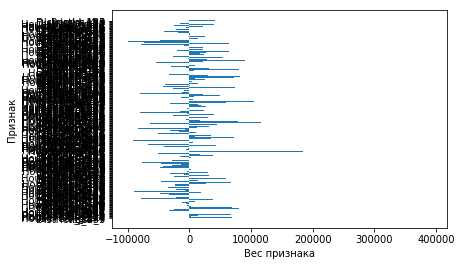

In [473]:
plt.barh(list(fn), lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [474]:
important_features = [
    feature
    for feature, weight in zip(fn, lr.coef_.flatten())
    if np.abs(weight) > 100000
]

print(important_features)

['DistrictId_199', 'DistrictId_181', 'DistrictId_131', 'Square', 'DistrictId_175', 'DistrictId_201', 'DistrictId_190', 'DistrictId_23']


In [475]:
lr.fit(
    X_train_scaled.loc[:, important_features],
    Y_train
)

Y_pred = lr.predict(X_test_scaled.loc[:, important_features])

In [476]:
r2_score(Y_test['Price'], Y_pred)

0.40335282821567164

### Попробуем метод главных компонент

In [477]:
from sklearn.decomposition import PCA

In [478]:
pca = PCA(random_state=100)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [481]:
pca.explained_variance_ratio_[:130].sum()

0.9169025545466267

In [482]:
pca = PCA(n_components=130, random_state=60)

X_train_mc = pca.fit_transform(X_train_scaled)
X_test_mc = pca.transform(X_test_scaled)

In [483]:
lr.fit(X_train_mc, Y_train)

Ridge(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [484]:
Y_pred_mc = lr.predict(X_test_mc)

In [485]:
r2_score(Y_test['Price'], Y_pred_mc)

0.5949992657638691

In [486]:
check_test_mc = pd.DataFrame({'y_test': Y_test['Price'], 'y_pred': Y_pred_mc.flatten()}, columns=['y_test', 'y_pred'])
check_test_mc['error'] = check_test_mc['y_pred'] - check_test_mc['y_test']

In [487]:
check_test_mc.describe()

,y_test,y_pred,error
count,2199.000000,2199.000000,2199.000000
mean,210617.169539,210845.361430,228.191891
std,87444.814187,68969.011770,55649.121360
min,62819.167655,24884.142328,-372927.766524
25%,156135.157466,165586.777469,-22584.830854
50%,190419.239316,202682.769146,961.880406
75%,244355.232230,253480.164527,25896.895922
max,633233.466570,495598.705347,270649.144923


### Результат посредственный

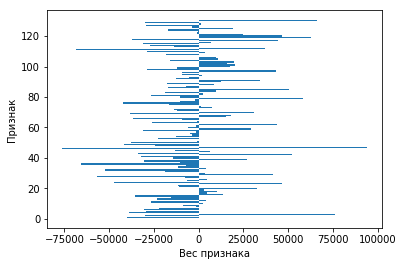

In [488]:
plt.barh(range(1,len(lr.coef_.flatten())+1), lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

### Алгоритм понижения размерности tSNE

In [489]:
from sklearn.manifold import TSNE

In [490]:
tsne = TSNE(n_components=2, learning_rate=200, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_scaled)

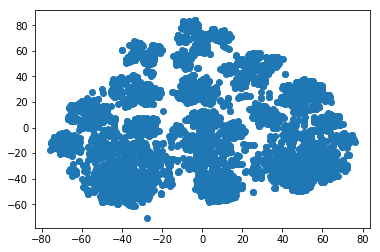

In [491]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

In [492]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=110)

In [493]:
labels_train = model.fit_predict(X_train_scaled)

In [494]:
model.cluster_centers_.shape

(3, 308)

In [495]:
model.inertia_

19143.409772459287

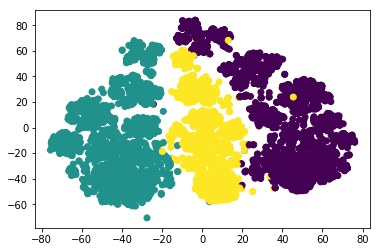

In [496]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)

In [497]:
labels_test = model.predict(X_test_scaled)

In [498]:
Y_train[labels_train == 0].mean()

Price    212800.620688
dtype: float64

In [499]:
Y_train[labels_train == 1].mean()

Price    159150.969057
dtype: float64

In [500]:
Y_train[labels_train == 2].mean()

Price    290730.383211
dtype: float64

In [501]:
Y_train.mean()

Price    210554.334228
dtype: float64

In [502]:
mp = np.zeros((model.n_clusters,1))
for i in range(model.n_clusters):
    mp[i] = Y_train[labels_train == i].mean()
mp.shape

(3, 1)

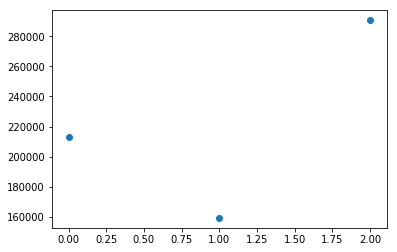

In [504]:
plt.scatter(range(model.n_clusters), mp)

In [505]:
lr.fit(X_train_scaled.loc[labels_train == 0], Y_train[labels_train == 0])

Y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0])

r2_score(Y_test[labels_test == 0], Y_test_pred_0)

0.4777048294454058

In [506]:
lr.fit(X_train_scaled.loc[labels_train == 1], Y_train[labels_train == 1])

Y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1])

r2_score(Y_test[labels_test == 1], Y_test_pred_1)

0.49464595880333784

In [507]:
lr.fit(X_train_scaled.loc[labels_train == 2], Y_train[labels_train == 2])

Y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test == 2])

r2_score(Y_test[labels_test == 2], Y_test_pred_2)

0.45722790995829654

In [508]:
Y_test_all = np.vstack([Y_test[labels_test == 0], Y_test[labels_test == 1], Y_test[labels_test == 2]])
Y_test_pred_all = np.vstack([Y_test_pred_0, Y_test_pred_1, Y_test_pred_2])

r2_score(Y_test_all, Y_test_pred_all)

0.658857102416355

In [511]:
(Y_test_all - Y_test_pred_all).std()

51048.7841382392

## 3. Выводы

Очень мешает большое количество районов... Что с этим делать я так и не понял...

Этаж - не стоит ожидать линейной зависимости цены от этажа, т.к. что первый, что последний одинаково дешево стоят. По этой причине этаж был вынесен в категориальную переменную.

Комнаты были вынесены в отдельную категорию из-за того, что комната - это дискретная величина.

В итоге, цена на квартиру в целом прямо зависит только от ее площади.

Большое количество категориальных переменных вынудило использовать регуляризацию Ridge.

Средняя квадратичная ошибка модели линейного регрессора - 50000 при средней цене 200000, т.е. 25% - довольно-таки много. Попытка построения моделей для кластеров улучшения не дала.

Многофакторный анализ - дело не простое...